In [1]:
%matplotlib inline
import random
import torch

In [6]:
def synthetic_data(w, b, num_example):
    X = torch.normal(0, 1, (num_example, len(w))) # [[1， 2][1， 2][[]……]
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape) # 每个噪声不同
    return X, y.reshape((-1, 1)) # n*w,返回一列

In [8]:
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [10]:
print("features:", features[0], "\nlabel:", labels[0])

features: tensor([ 0.3766, -1.7574]) 
label: tensor([10.9304])


In [11]:
 X = torch.normal(0, 1, (1000, 2))

In [12]:
x

NameError: name 'x' is not defined

In [13]:
X

tensor([[ 0.8922,  0.6618],
        [ 0.4813,  0.5945],
        [-0.5096,  0.7408],
        ...,
        [-0.2779, -0.5111],
        [-0.0995, -1.3250],
        [ 1.3457,  1.1499]])

In [16]:
X.shape

torch.Size([1000, 2])

In [17]:
features

tensor([[ 0.3766, -1.7574],
        [-0.2241,  1.0019],
        [ 0.8217, -0.3487],
        ...,
        [-1.0739, -0.6912],
        [ 0.1609, -0.1886],
        [-0.5500,  0.3578]])

In [19]:
labels.size()

torch.Size([1000, 1])

In [20]:
import matplotlib.pyplot as plt

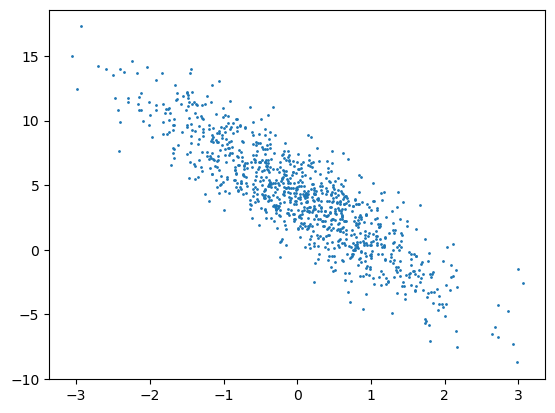

In [21]:
plt.figure()
plt.scatter(features[:, (1)].detach().numpy(), labels.detach().numpy(), 1)

In [24]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list((range(num_examples))) # 一个列表
    random.shuffle(indices) # 打乱顺序
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i:min(i + batch_size, num_examples)]) # 切片
        yield features[batch_indices], labels[batch_indices]
        

In [25]:
batch_size = 10
for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break;

tensor([[-1.2680, -0.6394],
        [-0.6427,  0.9225],
        [-1.4669,  0.6090],
        [ 0.4541, -0.4141],
        [-0.9918, -1.0301],
        [ 1.4529,  0.0845],
        [ 0.1949,  0.8241],
        [-1.0443, -0.6034],
        [-1.9915,  0.4618],
        [-0.5733,  1.4778]]) 
 tensor([[ 3.8485],
        [-0.2133],
        [-0.8076],
        [ 6.5111],
        [ 5.7098],
        [ 6.8177],
        [ 1.7803],
        [ 4.1522],
        [-1.3423],
        [-1.9830]])


In [26]:
w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

- 定义模型

In [27]:
def linreg(X, w, b):
    return torch.matmul(X, w) + b


In [28]:
def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [76]:
def sgd(params, lr, batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [77]:
lr = 0.03
num_epoches = 3
net = linreg
loss = squared_loss
for epoch in range(num_epoches):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y) # X和y的小批量损失 预测值
        l.sum().backward()
        sgd([w, b], lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch (epoch + 1), loss {float(train_l.mean()):f}')

epoch (epoch + 1), loss 0.036062
epoch (epoch + 1), loss 0.000152
epoch (epoch + 1), loss 0.000053


In [80]:
print(f'w的估计误差：{true_w - w.reshape(true_w.shape)}') # 真正的值给定了？
print(f'b的误差：{true_b - b}')

w的估计误差：tensor([-3.9339e-05, -3.6025e-04], grad_fn=<SubBackward0>)
b的误差：tensor([0.0003], grad_fn=<RsubBackward1>)
